# **Data Cleaning and Formatting:**

## **Import Important Libraries and Modules:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Export Target Dataframe:**

In [2]:
df = pd.read_csv('D:\\IT Courses\\Data Analysis Courses\\Data Analysis Projects\\Hotels Exploratory Data Analysis (EDA) Project\\Hotels_Exploratory_Data_Analysis_EDA_Project\\Dataset\\hotels.csv')

In [3]:
df_copy = df.copy()

## **1. Dataframe Inspection:**

In [4]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df_copy.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

## **2. Cleaning and Formatting:**

### **2.1. Dealing With Nan Values:**

In [6]:
df_copy.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
# Drop Columns ('agent', 'company'):
df_copy.drop(
    ['agent', 'company'],
    axis=1,
    inplace=True
)

In [8]:
# Drop Nan Values Of Columns ('country', 'children')
df_copy.dropna(
    subset=('country', 'children'),
    axis=0,
    inplace=True
)

In [9]:
df_copy.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### **2.2. Type Casting of Column (reservation_status_date) to Datetime:**

In [10]:
df_copy['reservation_status_date'] = pd.to_datetime(df_copy['reservation_status_date'])

In [11]:
df_copy['reservation_status_date'].info() # datetime64[ns]

<class 'pandas.core.series.Series'>
Index: 118898 entries, 0 to 119389
Series name: reservation_status_date
Non-Null Count   Dtype         
--------------   -----         
118898 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.8 MB


### **2.3. Data Normalization and Standardization:**

In [12]:
df_copy.describe(
    include='object'
)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3,81234,115425,118898,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Robert Smith,Michael.C@gmail.com,422-804-6403,************3627
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745,48,6,1,28


In [13]:
for column in df_copy.describe(include='object'):
    print(column)
    print(f'Number Of Unique Values = {df_copy[column].nunique()}')
    print(df_copy[column].unique())

hotel
Number Of Unique Values = 2
['Resort Hotel' 'City Hotel']
arrival_date_month
Number Of Unique Values = 12
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal
Number Of Unique Values = 5
['BB' 'FB' 'HB' 'SC' 'Undefined']
country
Number Of Unique Values = 177
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'Unknown' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PL

**2.3.1. Data Normalization of Column (meal):**

**Based on common hotel meal abbreviations, here are the likely full names for each abbreviation in the column:** 

- **BB**: Bed and Breakfast
- **FB**: Full Board (typically includes breakfast, lunch, and dinner)
- **HB**: Half Board (typically includes breakfast and dinner)
- **SC**: Self Catering
- **Undefined**: Undefined (no specific meal plan specified)

In [ ]:
meal_column_dictionary = {
    'BB':'Bed & Breakfast',
    'FB':'Full Board',
    'HB':'Half Board',
    'SC':'Self Catering',
    'Undefined':'Undefined'
}

In [15]:
def meal_normalization(meal_column):
    for key, value in meal_column_dictionary.items():
        if key.upper() == meal_column.upper():
            return(value)
    else:
        return(meal_column)

In [16]:
df_copy['meal'] = df_copy['meal'].apply(meal_normalization)

**2.3.2. Data Normalization of Column 'country'**

In [17]:
country_codes_to_names = {
    'PRT': 'Portugal',
    'GBR': 'United Kingdom',
    'USA': 'United States',
    'ESP': 'Spain',
    'IRL': 'Ireland',
    'FRA': 'France',
    'ROU': 'Romania',
    'NOR': 'Norway',
    'OMN': 'Oman',
    'ARG': 'Argentina',
    'POL': 'Poland',
    'DEU': 'Germany',
    'BEL': 'Belgium',
    'CHE': 'Switzerland',
    'CN': 'China', 
    'GRC': 'Greece',
    'ITA': 'Italy',
    'Unknown' : 'Not Disclose',
    'NLD': 'Netherlands',
    'DNK': 'Denmark',
    'RUS': 'Russia',
    'SWE': 'Sweden',
    'AUS': 'Australia',
    'EST': 'Estonia',
    'CZE': 'Czech Republic',
    'BRA': 'Brazil',
    'FIN': 'Finland',
    'MOZ': 'Mozambique',
    'BWA': 'Botswana',
    'LUX': 'Luxembourg',
    'SVN': 'Slovenia',
    'ALB': 'Albania',
    'IND': 'India',
    'CHN': 'China',
    'MEX': 'Mexico',
    'MAR': 'Morocco',
    'UKR': 'Ukraine',
    'SMR': 'San Marino',
    'LVA': 'Latvia',
    'PRI': 'Puerto Rico',
    'SRB': 'Serbia',
    'CHL': 'Chile',
    'AUT': 'Austria',
    'BLR': 'Belarus',
    'LTU': 'Lithuania',
    'TUR': 'Turkey',
    'ZAF': 'South Africa',
    'AGO': 'Angola',
    'CYM': 'Cayman Islands',
    'ZMB': 'Zambia',
    'CPV': 'Cabo Verde',
    'ZWE': 'Zimbabwe',
    'DZA': 'Algeria',
    'KOR': 'South Korea',
    'CRI': 'Costa Rica',
    'HUN': 'Hungary',
    'ARE': 'United Arab Emirates',
    'TUN': 'Tunisia',
    'JAM': 'Jamaica',
    'HRV': 'Croatia',
    'HKG': 'Hong Kong',
    'IRN': 'Iran',
    'GEO': 'Georgia',
    'AND': 'Andorra',
    'GIB': 'Gibraltar',
    'URY': 'Uruguay',
    'JEY': 'Jersey',
    'CAF': 'Central African Republic',
    'CYP': 'Cyprus',
    'COL': 'Colombia',
    'GGY': 'Guernsey',
    'KWT': 'Kuwait',
    'NGA': 'Nigeria',
    'MDV': 'Maldives',
    'VEN': 'Venezuela',
    'SVK': 'Slovakia',
    'FJI': 'Fiji',
    'KAZ': 'Kazakhstan',
    'PAK': 'Pakistan',
    'IDN': 'Indonesia',
    'LBN': 'Lebanon',
    'PHL': 'Philippines',
    'SEN': 'Senegal',
    'SYC': 'Seychelles',
    'AZE': 'Azerbaijan',
    'BHR': 'Bahrain',
    'NZL': 'New Zealand',
    'THA': 'Thailand',
    'DOM': 'Dominican Republic',
    'MKD': 'North Macedonia',
    'MYS': 'Malaysia',
    'ARM': 'Armenia',
    'JPN': 'Japan',
    'LKA': 'Sri Lanka',
    'CUB': 'Cuba',
    'CMR': 'Cameroon',
    'BIH': 'Bosnia and Herzegovina',
    'MUS': 'Mauritius',
    'COM': 'Comoros',
    'SUR': 'Suriname',
    'UGA': 'Uganda',
    'BGR': 'Bulgaria',
    'CIV': "Cote d'Ivoire",
    'JOR': 'Jordan',
    'SYR': 'Syria',
    'SGP': 'Singapore',
    'BDI': 'Burundi',
    'SAU': 'Saudi Arabia',
    'VNM': 'Vietnam',
    'PLW': 'Palau',
    'QAT': 'Qatar',
    'EGY': 'Egypt',
    'PER': 'Peru',
    'MLT': 'Malta',
    'MWI': 'Malawi',
    'ECU': 'Ecuador',
    'MDG': 'Madagascar',
    'ISL': 'Iceland',
    'UZB': 'Uzbekistan',
    'NPL': 'Nepal',
    'BHS': 'Bahamas',
    'MAC': 'Macau',
    'TGO': 'Togo',
    'TWN': 'Taiwan',
    'DJI': 'Djibouti',
    'STP': 'Sao Tome and Principe',
    'KNA': 'Saint Kitts and Nevis',
    'ETH': 'Ethiopia',
    'IRQ': 'Iraq',
    'HND': 'Honduras',
    'RWA': 'Rwanda',
    'KHM': 'Cambodia',
    'MCO': 'Monaco',
    'BGD': 'Bangladesh',
    'IMN': 'Isle of Man',
    'TJK': 'Tajikistan',
    'NIC': 'Nicaragua',
    'BEN': 'Benin',
    'VGB': 'British Virgin Islands',
    'TZA': 'Tanzania',
    'GAB': 'Gabon',
    'GHA': 'Ghana',
    'TMP': 'East Timor',
    'GLP': 'Guadeloupe',
    'KEN': 'Kenya',
    'LIE': 'Liechtenstein',
    'GNB': 'Guinea-Bissau',
    'MNE': 'Montenegro',
    'UMI': 'United States Minor Outlying Islands',
    'MYT': 'Mayotte',
    'FRO': 'Faroe Islands',
    'MMR': 'Myanmar',
    'PAN': 'Panama',
    'BFA': 'Burkina Faso',
    'LBY': 'Libya',
    'MLI': 'Mali',
    'NAM': 'Namibia',
    'BOL': 'Bolivia',
    'PRY': 'Paraguay',
    'BRB': 'Barbados',
    'ABW': 'Aruba',
    'AIA': 'Anguilla',
    'SLV': 'El Salvador',
    'DMA': 'Dominica',
    'PYF': 'French Polynesia',
    'GUY': 'Guyana',
    'LCA': 'Saint Lucia',
    'ATA': 'Antarctica',
    'GTM': 'Guatemala',
    'ASM': 'American Samoa',
    'MRT': 'Mauritania',
    'NCL': 'New Caledonia',
    'KIR': 'Kiribati',
    'SDN': 'Sudan',
    'ATF': 'French Southern Territories',
    'SLE': 'Sierra Leone',
    'LAO': 'Laos'
}

In [18]:
def country_normalization(country_column):
    for key, value in country_codes_to_names.items():
        if key.upper() == country_column.upper():
            return(value)
    else:
        return(country_column)

In [19]:
df_copy['country'] = df_copy['country'].apply(country_normalization)

**2.3.3. Data Normalization of Column 'is_canceled'**

In [20]:
is_canceled_dictionary = {
    1 : 'Canceled',
    0 : 'Not Canceled'
}

In [21]:
def is_canceled_normalization(is_canceled_column):
    for key, value in is_canceled_dictionary.items():
        if key == is_canceled_column:
            return(value)
    else:
        return(key)

In [22]:
df_copy['is_canceled'] = df_copy['is_canceled'].apply(is_canceled_normalization)

### **2.4. Dealing With Ouliers In Column 'adr' Average Daily Rate:**

In [23]:
df_copy.describe().T

,count,mean,min,25%,50%,75%,max,std
lead_time,118898.0,104.311435,0.0,18.0,69.0,161.0,737.0,106.903309
arrival_date_year,118898.0,2016.157656,2015.0,2016.0,2016.0,2017.0,2017.0,0.707459
arrival_date_week_number,118898.0,27.166555,1.0,16.0,28.0,38.0,53.0,13.589971
arrival_date_day_of_month,118898.0,15.80088,1.0,8.0,16.0,23.0,31.0,8.780324
stays_in_weekend_nights,118898.0,0.928897,0.0,0.0,1.0,2.0,16.0,0.996216
stays_in_week_nights,118898.0,2.502145,0.0,1.0,2.0,3.0,41.0,1.900168
adults,118898.0,1.858391,0.0,2.0,2.0,2.0,55.0,0.578576
children,118898.0,0.104207,0.0,0.0,0.0,0.0,10.0,0.399172
babies,118898.0,0.007948,0.0,0.0,0.0,0.0,10.0,0.09738
is_repeated_guest,118898.0,0.032011,0.0,0.0,0.0,0.0,1.0,0.176029


**Five Number Summary Of Column 'adr':**

In [24]:
adr_Q1 = np.quantile(df_copy['adr'], 0.25) # 70
adr_Q2 = np.quantile(df_copy['adr'], 0.50) # 95.0
adr_Q3 = np.quantile(df_copy['adr'], 0.75) # 126.0

adr_min = np.min(df_copy['adr']) # -6.38
adr_max = np.max(df_copy['adr']) # 5400.0

adr_IQR = adr_Q3 - adr_Q1 # 56.0

lower_boundry = adr_Q1 - (1.5 * adr_IQR) # -14.0
upper_boundary = adr_Q3 + (1.5 * adr_IQR) # 210.0

In [25]:
print(adr_Q1)
print(adr_Q2)
print(adr_Q3)
print(adr_min)
print(adr_max)
print(adr_IQR)
print(lower_boundry)
print(upper_boundary)

70.0
95.0
126.0
-6.38
5400.0
56.0
-14.0
210.0


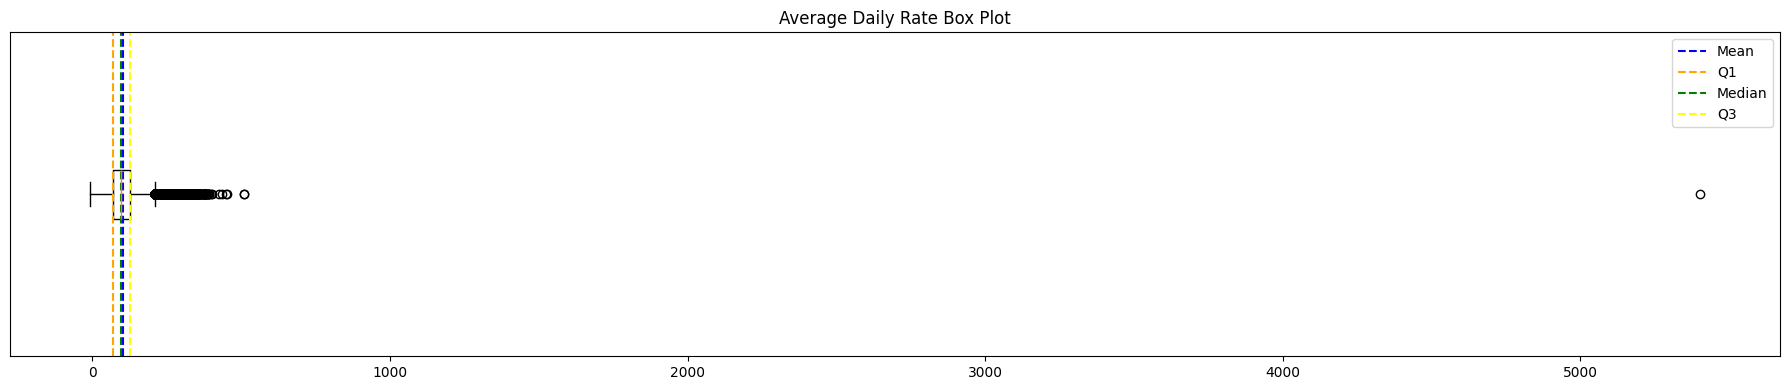

In [26]:
plt.figure(figsize=(18,4))
plt.boxplot(
    x=df_copy['adr'],
    vert=False
)
plt.title('Average Daily Rate Box Plot')
plt.axvline(x=np.mean(df_copy['adr']), color='blue', linestyle='--', label='Mean')
plt.axvline(x=np.quantile(df_copy['adr'], 0.25), color='orange', linestyle='--', label='Q1')
plt.axvline(x=np.quantile(df_copy['adr'], 0.50), color='green', linestyle='--', label='Median')
plt.axvline(x=np.quantile(df_copy['adr'], 0.75), color='yellow', linestyle='--', label='Q3')
plt.legend(loc='upper right')
plt.yticks([])
plt.tight_layout()

- **Action:** Delete values in the `adr` column that are above 5000.

- **Reason:** These values have been identified as outliers and may skew the analysis or results. Removing these outliers will help ensure the accuracy and reliability of the data analysis.

- **Impact:** This action will clean the dataset, potentially improving the performance of any models or analyses that rely on this dat

In [27]:
df_copy = df_copy[df_copy['adr'] < 5000]

In [28]:
df_copy['adr'].describe()

count    118897.000000
mean        101.958683
std          48.091199
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

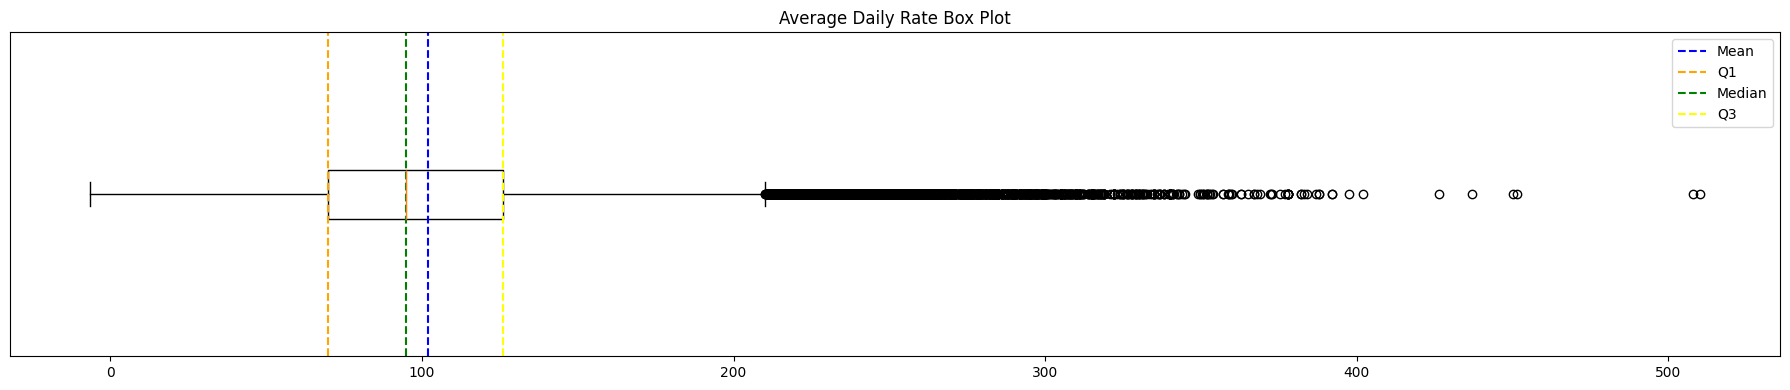

In [29]:
plt.figure(figsize=(18,4))
plt.boxplot(
    x=df_copy['adr'],
    vert=False
)
plt.title('Average Daily Rate Box Plot')
plt.axvline(x=np.mean(df_copy['adr']), color='blue', linestyle='--', label='Mean')
plt.axvline(x=np.quantile(df_copy['adr'], 0.25), color='orange', linestyle='--', label='Q1')
plt.axvline(x=np.quantile(df_copy['adr'], 0.50), color='green', linestyle='--', label='Median')
plt.axvline(x=np.quantile(df_copy['adr'], 0.75), color='yellow', linestyle='--', label='Q3')
plt.legend(loc='upper right')
plt.yticks([])
plt.tight_layout()

## **3. Export Cleaned and Formatted Dataframe Into CSV File:**

In [30]:
df_copy.to_csv(
    'cleaned_formatted_hotels_df.csv',
    index=False
)